<a href="https://colab.research.google.com/github/jotadram6/EACD-02-ESTADISTICA/blob/master/Sesi%C3%B3n_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Curso Estadística y Análisis exploratorio
Profesor: José David Ruiz Álvarez

Correo: josed.ruiz@udea.edu.co

## Sesión 4

### Intervalos de confianza

### Aplicación de conceptos y métodos del curso


#Empecemos con Intervalos de confianza

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def RectaConVariabilidad(xmin,xmax,m,b,puntos,mu=0,sigma=0.2):
  return np.linspace(xmin,xmax,puntos),m*np.linspace(xmin,xmax,puntos)+b+np.random.normal(mu,sigma,puntos)

In [ ]:
def Line_chi2(Obs,x,m,b):
  if len(Obs)!=len(x):
    print("Debe haber la misma cantidad de puntos observados como de x")
    return
  Chi2=((Obs-(m*x+b))**2)/(np.sqrt((m*x+b)**2))
  return sum(Chi2)

In [ ]:
def mb_estimator(x,y,m_min,m_max,m_n,b_min,b_max,b_n,v=False):
  m_scan=np.linspace(m_min,m_max,m_n)
  b_scan=np.linspace(b_min,b_max,b_n)
  chi2scan=[]
  for i in m_scan:
    for j in b_scan:
      chi2scan.append([i,j,Line_chi2(y,x,i,j)])
  OnlyChi2=np.array(chi2scan).take(indices=2,axis=1)
  MinChi2=OnlyChi2.min()
  ArgMinChi2=OnlyChi2.argmin()
  if v: print("Chi2 mínimo encontrado:",MinChi2)
  bestm=np.array(chi2scan).take(indices=0,axis=1)[ArgMinChi2]
  bestb=np.array(chi2scan).take(indices=1,axis=1)[ArgMinChi2]
  if v: print("Parámetros m y b encontrados:",bestm,bestb)
  return MinChi2, bestm, bestb

In [ ]:
Pendiente=np.random.uniform(0.1,3)
Intercepto=np.random.uniform(5,10)
print(Pendiente,Intercepto)

2.553760688594244 9.603288153680356


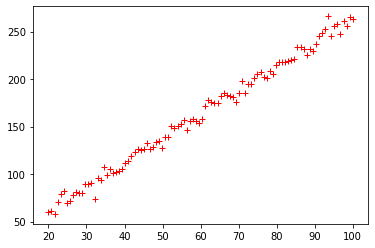

In [ ]:
RectaPrincipal=RectaConVariabilidad(20,100,Pendiente,Intercepto,100,sigma=5)
plt.plot(RectaPrincipal[0],RectaPrincipal[1],'r+')

In [ ]:
ResultadosEstimadorReales=mb_estimator(RectaPrincipal[0],RectaPrincipal[1],0.1,3,100,5,10,100,v=True)

Chi2 mínimo encontrado: 20.51919630585109
Parámetros m y b encontrados: 2.5606060606060606 9.595959595959595


## Muestreo del test estadístico y de los estimadores

In [ ]:
NSample=1000
Chi2Sampling=[]
bSampling=[]
mSampling=[]
for i in range(NSample):
  RectaExperim=RectaConVariabilidad(20,100,Pendiente,Intercepto,100,sigma=5)
  ResultadosEstimador=mb_estimator(RectaExperim[0],RectaExperim[1],0.1,3,100,5,10,100)
  Chi2Sampling.append(ResultadosEstimador[0])
  bSampling.append(ResultadosEstimador[2])
  mSampling.append(ResultadosEstimador[1])

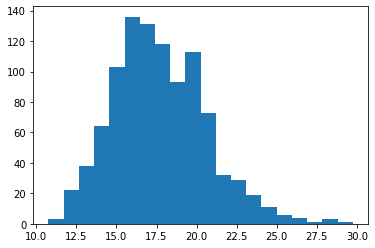

In [ ]:
Chi2Histo=plt.hist(Chi2Sampling, bins=20)

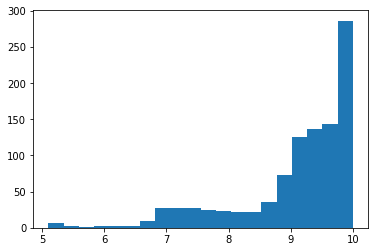

In [ ]:
bHisto=plt.hist(bSampling, bins=20)

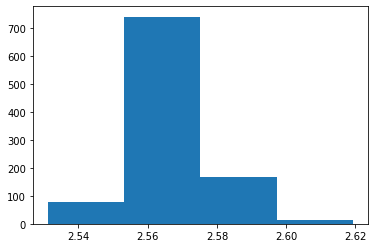

In [ ]:
mHisto=plt.hist(mSampling, bins=4)

In [ ]:
MaskToIntegrate=np.array(Chi2Histo[1][:-1])>=ResultadosEstimadorReales[0]
pvalue_h0=sum(np.multiply(MaskToIntegrate,np.array(Chi2Histo[0])))/sum(Chi2Histo[0])
print("El valor p para la hipótesis es:", pvalue_h0)

El valor p para la hipótesis es: 0.106


## Intervalos de confianza para ambos parámetros a diferentes niveles de confianza

In [ ]:
Beta68=0.16; Alpha68=Beta68+0.68
m68min=np.quantile(mSampling,Beta68)
m68max=np.quantile(mSampling,Alpha68)
print("El intervalo de confianza a 68% CL para m es:",m68min,m68max)

El intervalo de confianza a 68% CL para m es: 2.5606060606060606 2.58989898989899


In [ ]:
Beta95=0.025; Alpha95=Beta95+0.95
m95min=np.quantile(mSampling,Beta95)
m95max=np.quantile(mSampling,Alpha95)
print("El intervalo de confianza a 95% CL para m es:",m95min,m95max)

El intervalo de confianza a 95% CL para m es: 2.5313131313131314 2.5898989898989897


In [ ]:
b68min=np.quantile(bSampling,Beta68)
b68max=np.quantile(bSampling,Alpha68)
print("El intervalo de confianza a 68% CL para b es:",b68min,b68max)

El intervalo de confianza a 68% CL para b es: 8.131313131313131 10.0


In [ ]:
b95min=np.quantile(bSampling,Beta95)
b95max=np.quantile(bSampling,Alpha95)
print("El intervalo de confianza a 95% CL para b es:",b95min,b95max)

El intervalo de confianza a 95% CL para b es: 6.767676767676768 10.0


[(5.0, 12.0), (2.5, 2.6)]

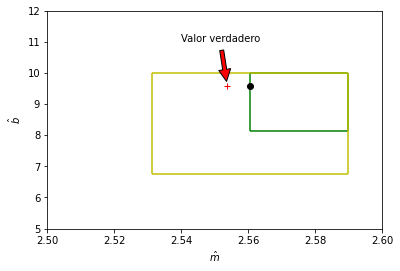

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hlines(b68min,m68min,m68max,"g")
ax.hlines(b68max,m68min,m68max,"g")
ax.vlines(m68min,b68min,b68max,"g")
ax.vlines(m68max,b68min,b68max,"g")
ax.hlines(b95min,m95min,m95max,"y")
ax.hlines(b95max,m95min,m95max,"y")
ax.vlines(m95min,b95min,b95max,"y")
ax.vlines(m95max,b95min,b95max,"y")
ax.plot(Pendiente,Intercepto,"r+")
ax.plot(ResultadosEstimadorReales[1],ResultadosEstimadorReales[2],"ko")
ax.annotate('Valor verdadero', xy=(Pendiente,Intercepto), xytext=(2.54, 11),
            arrowprops=dict(facecolor='red', shrink=0.1))
ax.set_xlabel("$\hat{m}$")
ax.set_ylabel("$\hat{b}$")
ax.set(xlim=(2.5, 2.6), ylim=(5, 12))

##Ejercicio 1: 
Repita el mismo procedimiento pero para la estimación de los intervalos de confianza pero usando

RectaConVariabilidad(50,100,Pendiente,Intercepto,100,sigma=15)

##Ejercicio 2: 
Repita el mismo ejercicio pero utilizando la verosimilitud como test estadístico en lugar del chi2.

##Ejercicio 3:
Tome los datos del repositorio central llamados X.csv y Y.csv y trate de modelarlos con las herramientas vistas:
1. Haga una exploración gráfica.
2. Plantee una hipótesis.
3. Defina un test estadístico.
4. Obtenga los parámetros que mejor ajustan los datos según su hipótesis.
5. Calcule qué tan bien se ajusta su modelo con el p-value.
6. Obtenga el intervalo de confianza de sus parámetros para 68% y 95% CL.

#Ejemplo práctico: Data real
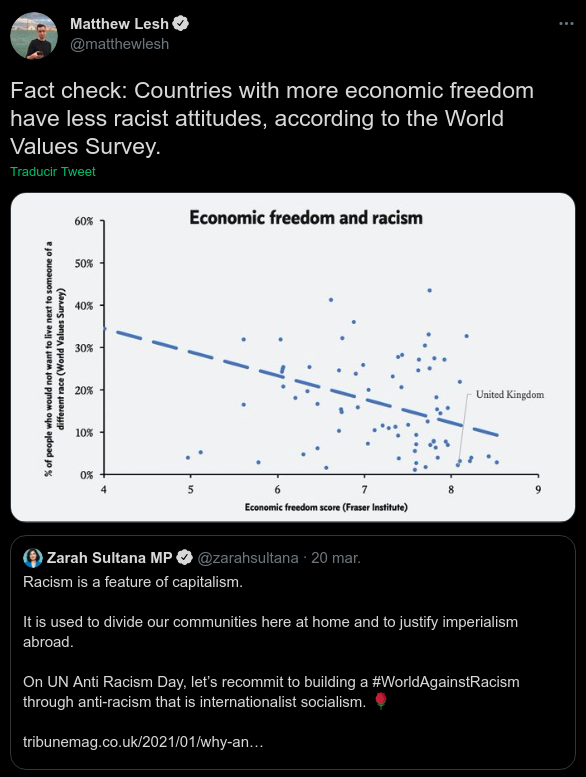

Fuente: https://twitter.com/matthewlesh/status/1373896138047188993?s=20

Datos WVS: https://www.worldvaluessurvey.org/WVSDocumentationWV7.jsp

Datos Fraser Institute: https://raw.githubusercontent.com/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-02-ESTADISTICA/master/SkimmedFraser.csv

##Vicios de análisis:


1.   Fact check: Está haciendo una modelación, no está simplemente observando un hecho incontrovertible.
2.   According to the WVS: En realidad es de acuerdo a los datos del WVS y su modelación.
3.   No considera errores asociados a los datos.
4.   Se asume que la muestra es representativa del país. 
5.   Sutividad de la interpretación.
6.   Interpretación de la variable como indicador unívoco de racismo.
7.   No indica de forma rigurosa las fuentes y el preproamiento que tuvo que hacer a los datos.
8.   Nube de puntos, no parecen tener mucha correlación.
9.   Tratamiento de puntos atípicos. 
10.  Existen hechos adicionales que desacreditan las conclusiones, por ejemplo US es uno de los países de mayor libertad económica pero con pero historia de racismo.
11.  No comparte detalles del análisis, lo que impide su reproducibilidad.



In [ ]:
!pip install pyreadstat

     |████████████████████████████████| 2.5MB 5.6MB/s 


In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!ls '/gdrive/My Drive/UdeA/EspecializacionDatosIngenieria/'

'Cohorte 2 (2021-1).xlsx'
 efw-2020-master-index-data-for-researchers.xlsx
'EVS_WVS_Joint_v1.1.0 SPSS.sav'
 formato_solicitud_contrato_catedra-1.docx
 formato_solicitud_contrato_catedra-1.docx.pdf
'Reporte de José David Ruiz- Estadistica.docx'
'Sesión 1.ipynb'
'Sesión 2'
'Sesión 3'
'Sesión 4'
 SkimmedFraser.csv
 WVS_Cross-National_Wave_7_sav_v1_6.sav


In [ ]:
WVS_df = pd.read_spss('/gdrive/My Drive/UdeA/EspecializacionDatosIngenieria/WVS_Cross-National_Wave_7_sav_v1_6.sav')

In [ ]:
RacismTwitter=WVS_df[['Q19', 'B_COUNTRY_ALPHA']]

In [ ]:
RacismTwitter

,Q19,B_COUNTRY_ALPHA
0,Not mentioned,AND
1,Not mentioned,AND
2,Not mentioned,AND
3,Not mentioned,AND
4,Not mentioned,AND
...,...,...
70862,Not mentioned,ZWE
70863,Not mentioned,ZWE
70864,Not mentioned,ZWE
70865,Mentioned,ZWE


In [ ]:
MaskedRacism=RacismTwitter.where(RacismTwitter["Q19"] == 'Mentioned')
AntiMaskedRacism=RacismTwitter.where(RacismTwitter["Q19"] != 'Mentioned')

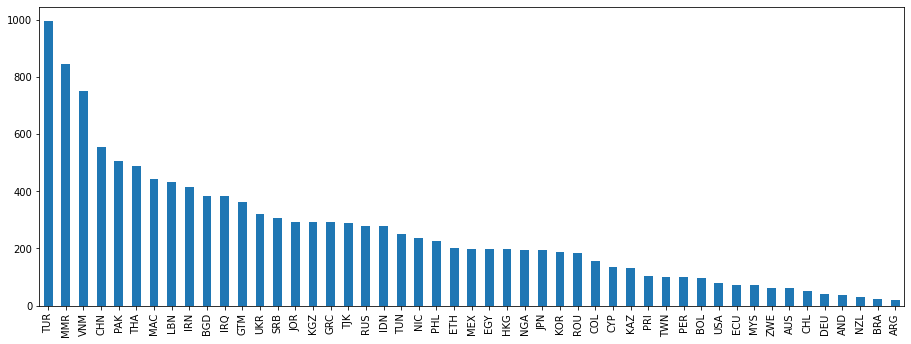

In [ ]:
fig1, ax1 = plt.subplots()
MaskedRacism["B_COUNTRY_ALPHA"].value_counts().plot(ax=ax1, kind='bar')
fig1.set_size_inches(15.5, 5.5)

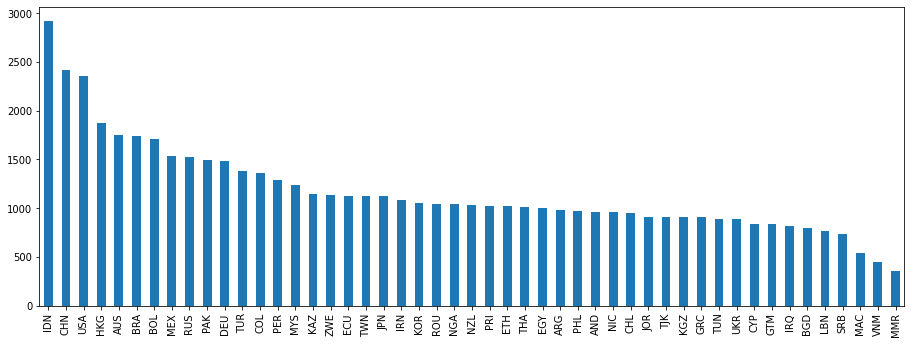

In [ ]:
fig2, ax2 = plt.subplots()
AntiMaskedRacism["B_COUNTRY_ALPHA"].value_counts().plot(ax=ax2, kind='bar')
fig2.set_size_inches(15.5, 5.5)

In [ ]:
FrequencyRacism=MaskedRacism["B_COUNTRY_ALPHA"].value_counts()/(MaskedRacism["B_COUNTRY_ALPHA"].value_counts()+AntiMaskedRacism["B_COUNTRY_ALPHA"].value_counts())

In [ ]:
FrequencyRacism

AND    0.038845
ARG    0.020937
AUS    0.033646
BGD    0.323181
BOL    0.052778
BRA    0.013621
CHL    0.051000
CHN    0.186532
COL    0.101974
CYP    0.137295
DEU    0.027577
ECU    0.060000
EGY    0.165000
ETH    0.165574
GRC    0.243311
GTM    0.302577
HKG    0.094940
IDN    0.087188
IRN    0.276184
IRQ    0.318333
JOR    0.243558
JPN    0.147416
KAZ    0.103448
KGZ    0.243333
KOR    0.151807
LBN    0.359167
MAC    0.448835
MEX    0.114697
MMR    0.704167
MYS    0.054836
NGA    0.156831
NIC    0.197500
NZL    0.027436
PAK    0.253133
PER    0.071532
PHL    0.188490
PRI    0.092280
ROU    0.149266
RUS    0.154696
SRB    0.295869
THA    0.324667
TJK    0.241667
TUN    0.218997
TUR    0.418771
TWN    0.081766
UKR    0.266777
USA    0.032033
VNM    0.624167
ZWE    0.052413
Name: B_COUNTRY_ALPHA, dtype: float64

##Ejercicio 4:
Extraiga alguna variable de interés del WVS como se ha hecho en el ejemplo y que pueda ser de interés para usted. 

In [ ]:
Fraser_df = pd.read_csv('/gdrive/My Drive/UdeA/EspecializacionDatosIngenieria/SkimmedFraser.csv')

In [ ]:
FraserTwitter=Fraser_df[['ISO_Code', 'Economic Freedom Summary Index']]

In [ ]:
FraserTwitter

,ISO_Code,Economic Freedom Summary Index
0,ALB,"7,80"
1,DZA,"4,97"
2,AGO,"4,75"
3,ARG,"5,78"
4,ARM,"7,92"
...,...,...
4045,VEN,"7,33"
4046,VNM,NaN
4047,YEM,NaN
4048,ZMB,"5,27"


In [ ]:
RacismIndex=[]
FreedomIndex=[]
DictFreedomRacism={}
for i in FrequencyRacism.keys():
  FreedomSearch=FraserTwitter.loc[FraserTwitter['ISO_Code'] == i]
  if FreedomSearch.size < 1: continue
  #print(i,FreedomSearch.size,FreedomSearch["Economic Freedom Summary Index"].iloc[0])
  FreedomScore=float(FreedomSearch["Economic Freedom Summary Index"].iloc[0].replace(",","."))
  FreedomIndex.append(FreedomScore)
  RacismIndex.append(FrequencyRacism[i])
  DictFreedomRacism[i]=[FreedomScore,FrequencyRacism[i]]

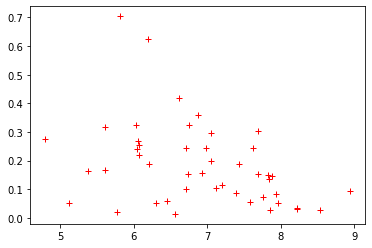

In [ ]:
plt.plot(FreedomIndex,RacismIndex,"r+")

In [ ]:
DictFreedomRacism['COL']

[6.71, 0.10197368421052631]

##Tratemos de hacer un ajuste lineal

In [ ]:
WVS_FredomvsRacism_Intento1=mb_estimator(np.array(FreedomIndex),np.array(RacismIndex),-10,-1,100,0,10,100,v=True)

Chi2 mínimo encontrado: 33.35329213788831
Parámetros m y b encontrados: -1.0 7.2727272727272725


In [ ]:
WVS_FredomvsRacism_Intento2=mb_estimator(np.array(FreedomIndex),np.array(RacismIndex),-2,0,100,3,8,100,v=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


Chi2 mínimo encontrado: 11.504478043125301
Parámetros m y b encontrados: -0.38383838383838365 3.101010101010101


In [ ]:
WVS_FredomvsRacism_Intento3=mb_estimator(np.array(FreedomIndex),np.array(RacismIndex),-1,0,100,0,5,100,v=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


Chi2 mínimo encontrado: 3.5013594939941766
Parámetros m y b encontrados: -0.09090909090909083 0.8585858585858586


In [ ]:
#Matriz de covarianza
np.cov(FreedomIndex,RacismIndex)

array([[ 0.90865527, -0.05483092],
       [-0.05483092,  0.02156255]])

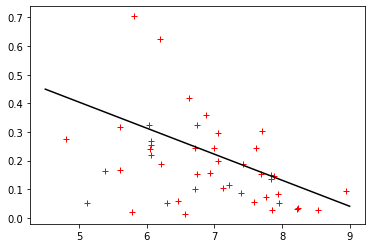

In [ ]:
plt.plot(FreedomIndex,RacismIndex,"r+")
x=np.linspace(4.5,9,100)
y=WVS_FredomvsRacism_Intento3[2]+(WVS_FredomvsRacism_Intento3[1]*x)
plt.plot(x,y,"k")

In [ ]:
MaximumVariations=np.abs(WVS_FredomvsRacism_Intento3[2]+(WVS_FredomvsRacism_Intento3[1]*np.array(FreedomIndex))-np.array(RacismIndex))

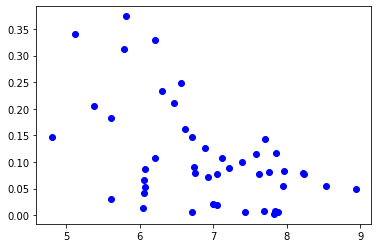

In [ ]:
plt.plot(FreedomIndex,MaximumVariations,"bo")

In [ ]:
def WVS_Sintetico(x,m,b,SigmaVariations,mu=0):
  RandomVariations=[]
  for i in range(len(x)):
    RandomVariations.append(np.random.normal(mu,SigmaVariations[i]))
  return (m*x)+b+np.array(RandomVariations)

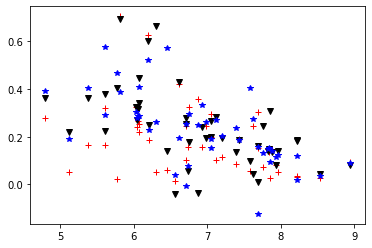

In [ ]:
RectaExperim1=WVS_Sintetico(np.array(FreedomIndex),WVS_FredomvsRacism_Intento3[1],WVS_FredomvsRacism_Intento3[2],MaximumVariations)
RectaExperim2=WVS_Sintetico(np.array(FreedomIndex),WVS_FredomvsRacism_Intento3[1],WVS_FredomvsRacism_Intento3[2],MaximumVariations)
plt.plot(FreedomIndex,RacismIndex,"r+")
plt.plot(FreedomIndex,RectaExperim1,"kv")
plt.plot(FreedomIndex,RectaExperim2,"b*")

## Muestreo de test estadístico y estimadores

In [ ]:
NSample=100
Chi2Sampling=[]
bSampling=[]
mSampling=[]
for i in range(NSample):
  RectaExperim=WVS_Sintetico(np.array(FreedomIndex),WVS_FredomvsRacism_Intento3[1],WVS_FredomvsRacism_Intento3[2],MaximumVariations)
  ResultadosEstimador=mb_estimator(np.array(FreedomIndex),RectaExperim,-2,0,200,0,5,200)
  Chi2Sampling.append(ResultadosEstimador[0])
  bSampling.append(ResultadosEstimador[2])
  mSampling.append(ResultadosEstimador[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


Text(0.5, 0, '$\\hat{m}$')

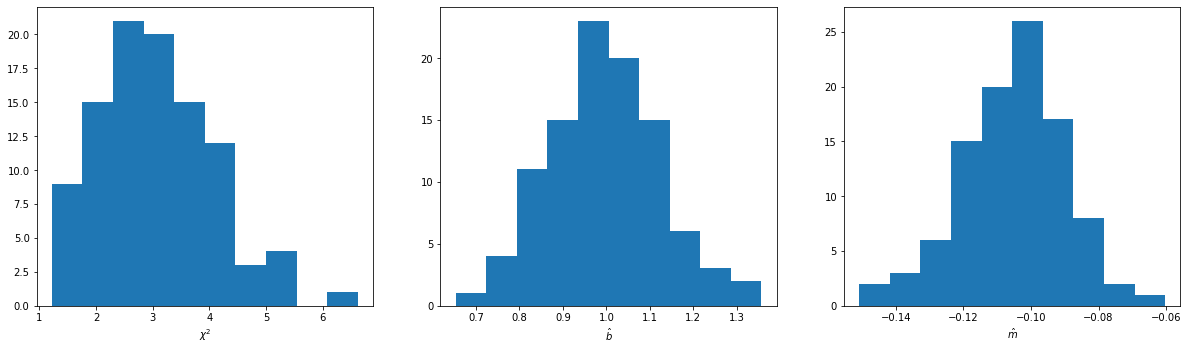

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(20.5, 5.5)
Chi2Histo=ax1.hist(Chi2Sampling, bins=10)
bHisto=ax2.hist(bSampling, bins=10)
mHisto=ax3.hist(mSampling, bins=10)
ax1.set_xlabel("$\chi^{2}$")
ax2.set_xlabel("$\hat{b}$")
ax3.set_xlabel("$\hat{m}$")

In [ ]:
MaskToIntegrate=np.array(Chi2Histo[1][:-1])>=WVS_FredomvsRacism_Intento3[0]
pvalue_h0=sum(np.multiply(MaskToIntegrate,np.array(Chi2Histo[0])))/sum(Chi2Histo[0])
print("El valor p para la hipótesis es:", pvalue_h0)

El valor p para la hipótesis es: 0.2


El intervalo de confianza a 68% CL para m es: -0.12060301507537696 -0.09045226130653261
El intervalo de confianza a 95% CL para m es: -0.14070351758793964 -0.0751256281407036
El intervalo de confianza a 68% CL para b es: 0.8753768844221106 1.105527638190955
El intervalo de confianza a 95% CL para b es: 0.7525125628140704 1.269472361809045


[(0.6020100502512564, 1.5233668341708542),
 (-0.16884422110552758, -0.06010050251256288)]

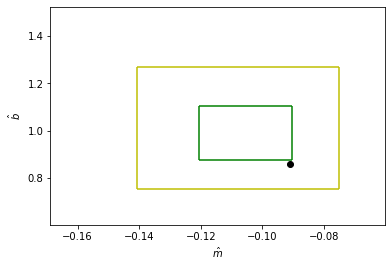

In [ ]:
Beta68=0.16; Alpha68=Beta68+0.68
Beta95=0.025; Alpha95=Beta95+0.95
m68min=np.quantile(mSampling,Beta68)
m68max=np.quantile(mSampling,Alpha68)
print("El intervalo de confianza a 68% CL para m es:",m68min,m68max)
m95min=np.quantile(mSampling,Beta95)
m95max=np.quantile(mSampling,Alpha95)
print("El intervalo de confianza a 95% CL para m es:",m95min,m95max)
b68min=np.quantile(bSampling,Beta68)
b68max=np.quantile(bSampling,Alpha68)
print("El intervalo de confianza a 68% CL para b es:",b68min,b68max)
b95min=np.quantile(bSampling,Beta95)
b95max=np.quantile(bSampling,Alpha95)
print("El intervalo de confianza a 95% CL para b es:",b95min,b95max)
fig2 = plt.figure()
ax = fig2.add_subplot(111)
ax.hlines(b68min,m68min,m68max,"g")
ax.hlines(b68max,m68min,m68max,"g")
ax.vlines(m68min,b68min,b68max,"g")
ax.vlines(m68max,b68min,b68max,"g")
ax.hlines(b95min,m95min,m95max,"y")
ax.hlines(b95max,m95min,m95max,"y")
ax.vlines(m95min,b95min,b95max,"y")
ax.vlines(m95max,b95min,b95max,"y")
ax.plot(WVS_FredomvsRacism_Intento3[1],WVS_FredomvsRacism_Intento3[2],"ko")
ax.set_xlabel("$\hat{m}$")
ax.set_ylabel("$\hat{b}$")
ax.set(xlim=(m95min*1.2, m95max*0.8), ylim=(b95min*0.8, b95max*1.2))

##Ejercicio 5:
Complete el mismo análisis para otra variable del WVS en función de la libertad económica y saque conclusiones sobre posible dependencia utilizando regresiones lineales.

## Veamos cómo se comporta una hipótesis alternativa, una constante

In [ ]:
def Constant_chi2(Obs,x,a):
  if len(Obs)!=len(x):
    print("Debe haber la misma cantidad de puntos observados como de x")
    return
  Chi2=((Obs-a)**2)/(np.sqrt((a)**2))
  return sum(Chi2)

In [ ]:
def a_estimator(x,y,a_min,a_max,a_n,v=False):
  a_scan=np.linspace(a_min,a_max,a_n)
  chi2scan=[]
  for j in a_scan:
    chi2scan.append([j,Constant_chi2(y,x,j)])
  OnlyChi2=np.array(chi2scan).take(indices=1,axis=1)
  MinChi2=OnlyChi2.min()
  ArgMinChi2=OnlyChi2.argmin()
  if v: print("Chi2 mínimo encontrado:",MinChi2)
  besta=np.array(chi2scan).take(indices=0,axis=1)[ArgMinChi2]
  if v: print("Parámetro a encontrado:",besta)
  return MinChi2, besta

In [ ]:
WVS_FredomvsRacism_Const1=a_estimator(np.array(FreedomIndex),np.array(RacismIndex),0,2,100,v=True)

Chi2 mínimo encontrado: 4.61408478667835
Parámetro a encontrado: 0.24242424242424243


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


In [ ]:
WVS_FredomvsRacism_Const2=a_estimator(np.array(FreedomIndex),np.array(RacismIndex),0,1,100,v=True)

Chi2 mínimo encontrado: 4.607818560204203
Parámetro a encontrado: 0.23232323232323235


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


In [ ]:
WVS_FredomvsRacism_Const3=a_estimator(np.array(FreedomIndex),np.array(RacismIndex),0,0.5,100,v=True)

Chi2 mínimo encontrado: 4.606075287928805
Parámetro a encontrado: 0.2373737373737374


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


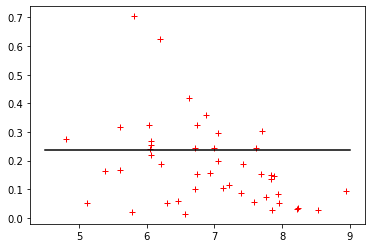

In [ ]:
plt.plot(FreedomIndex,RacismIndex,"r+")
x=np.linspace(4.5,9,100)
y=WVS_FredomvsRacism_Const3[1]*np.ones(100)
plt.plot(x,y,"k")

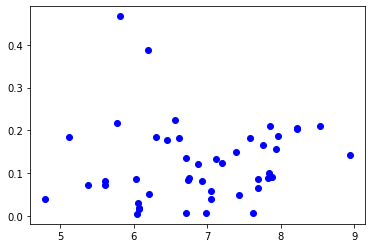

In [ ]:
MaximumVariationsConst=np.abs((WVS_FredomvsRacism_Const3[1]*np.ones_like(np.array(RacismIndex)))-np.array(RacismIndex))
plt.plot(FreedomIndex,MaximumVariationsConst,"bo")

In [ ]:
def WVS_Sintetico_Const(x,a,SigmaVariations,mu=0):
  RandomVariations=[]
  for i in range(len(x)):
    RandomVariations.append(np.random.normal(mu,SigmaVariations[i]))
  return (a*np.ones_like(np.array(x)))+np.array(RandomVariations)

In [ ]:
NSample=200
Chi2SamplingConst=[]
aSamplingConst=[]
for i in range(NSample):
  ConstExperim=WVS_Sintetico_Const(np.array(FreedomIndex),WVS_FredomvsRacism_Const3[1],MaximumVariationsConst)
  ResultadosEstimador=a_estimator(np.array(FreedomIndex),ConstExperim,0,0.5,100)
  Chi2SamplingConst.append(ResultadosEstimador[0])
  aSamplingConst.append(ResultadosEstimador[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


Text(0.5, 0, '$\\hat{a}$')

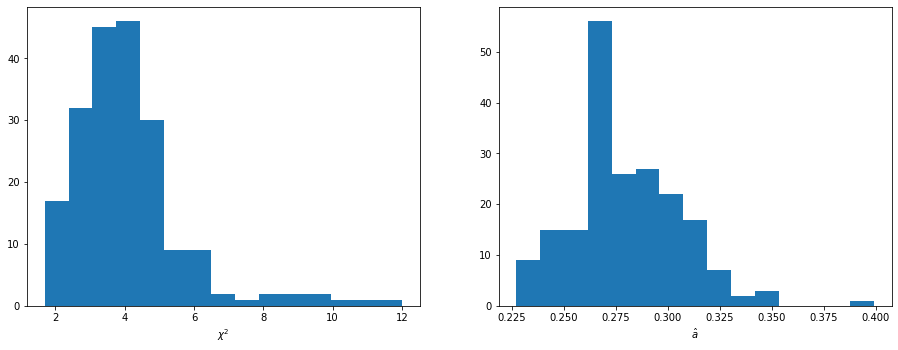

In [ ]:
figC, (ax1C, ax2C) = plt.subplots(1, 2)
figC.set_size_inches(15.5, 5.5)
Chi2HistoC=ax1C.hist(Chi2SamplingConst, bins=15)
aHistoC=ax2C.hist(aSamplingConst, bins=15)
ax1C.set_xlabel("$\chi^{2}$")
ax2C.set_xlabel("$\hat{a}$")

In [ ]:
MaskToIntegrateC=np.array(Chi2HistoC[1][:-1])>=WVS_FredomvsRacism_Const3[0]
pvalue_h1=sum(np.multiply(MaskToIntegrateC,np.array(Chi2HistoC[0])))/sum(Chi2HistoC[0])
print("El valor p para la hipótesis alternativa es:", pvalue_h1)

El valor p para la hipótesis alternativa es: 0.15


In [ ]:
a68min=np.quantile(aSamplingConst,Beta68)
a68max=np.quantile(aSamplingConst,Alpha68)
a95min=np.quantile(aSamplingConst,Beta95)
a95max=np.quantile(aSamplingConst,Alpha95)
print("El valor de a de los datos es:",WVS_FredomvsRacism_Const3[1])
print("El intervalo de confianza a 68% CL para a es:",a68min,a68max)
print("El intervalo de confianza a 95% CL para a es:",a95min,a95max)

El valor de a de los datos es: 0.2373737373737374
El intervalo de confianza a 68% CL para a es: 0.2575757575757576 0.30303030303030304
El intervalo de confianza a 95% CL para a es: 0.2373737373737374 0.3383838383838384


##Ejercicio 6:
Plantee una hipótesis alternativa a una constante o una línea recta y determine para el caso del racismo en función de la libertad económica su posible aplicabilidad, estimadores e intervalos de confianza.